In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

download the Energy Data from the link provided

In [2]:
import requests

# URL of the dataset
url = "https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the response to a file
    with open("energydata_complete.csv", "wb") as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print("Failed to download dataset.")


Dataset downloaded successfully.


load data

In [3]:
data = pd.read_csv('energydata_complete.csv')

Convert the 'date' column to datetime format

In [15]:
data['date'] = pd.to_datetime(data['date'])

Plot the appliances energy consumption for the whole period

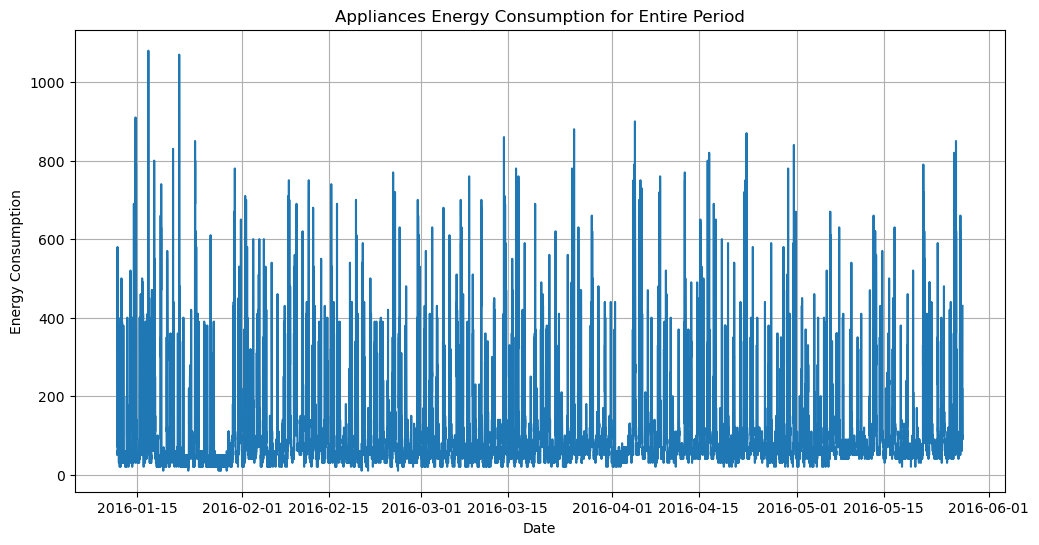

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['Appliances'])
plt.title('Appliances Energy Consumption for Entire Period')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

Plot a closer look at energy consumption for one week

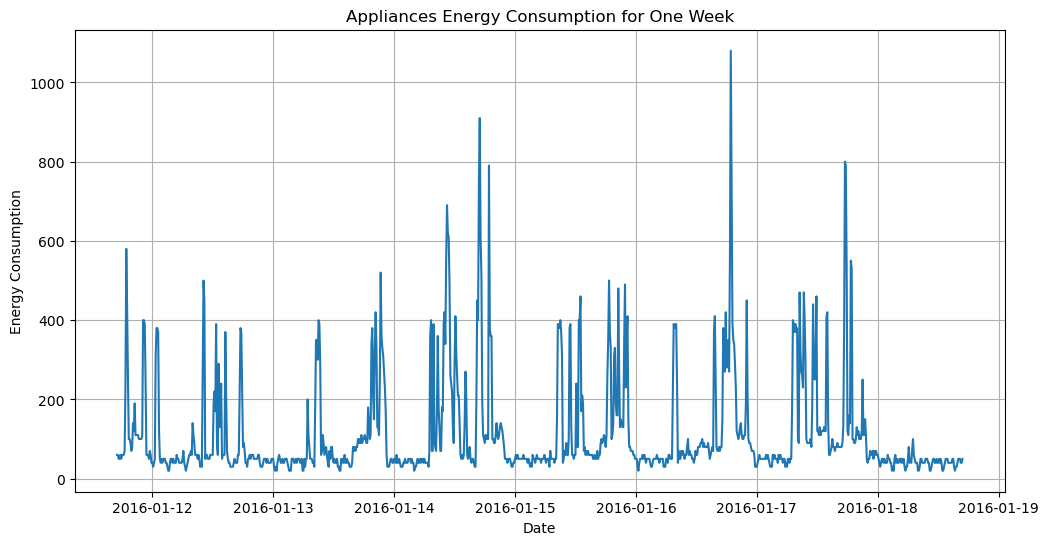

In [13]:
one_week_data = data[data['date'] < data['date'].min() + pd.Timedelta(days=7)]
plt.figure(figsize=(12, 6))
plt.plot(one_week_data['date'], one_week_data['Appliances'])
plt.title('Appliances Energy Consumption for One Week')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

Plot heatmap of hourly consumption of appliances for a week

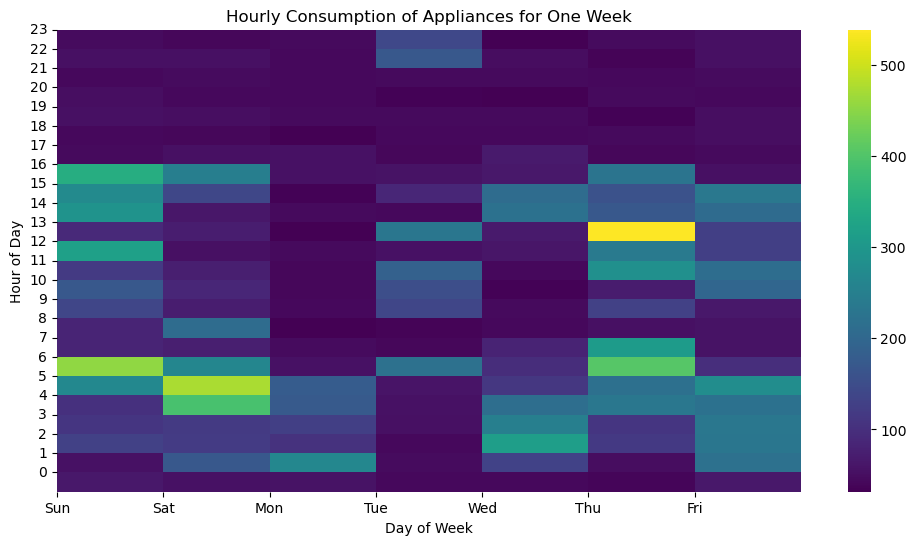

In [14]:
week_data = data[(data['date'] >= data['date'].min()) & (data['date'] < data['date'].min() + pd.Timedelta(days=7))]
hourly_heatmap = week_data.pivot_table(index=week_data['date'].dt.hour, columns=week_data['date'].dt.dayofweek, values='Appliances', aggfunc='mean')

# Reorder columns to start from Sunday (0) and end on Saturday (6)
hourly_heatmap = hourly_heatmap[[6, 5, 0, 1, 2, 3, 4]]

# Define custom labels for day of week
days_of_week = ['Sun', 'Sat', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_heatmap, cmap='viridis')
plt.title('Hourly Consumption of Appliances for One Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')

# Set y-axis ticks and labels in reverse order
plt.yticks(rotation=0)
plt.yticks(range(len(hourly_heatmap.index)), reversed(hourly_heatmap.index))

# Set x-axis ticks and labels
plt.xticks(range(7), days_of_week)

plt.show()


Plot histogram of energy consumption of appliances

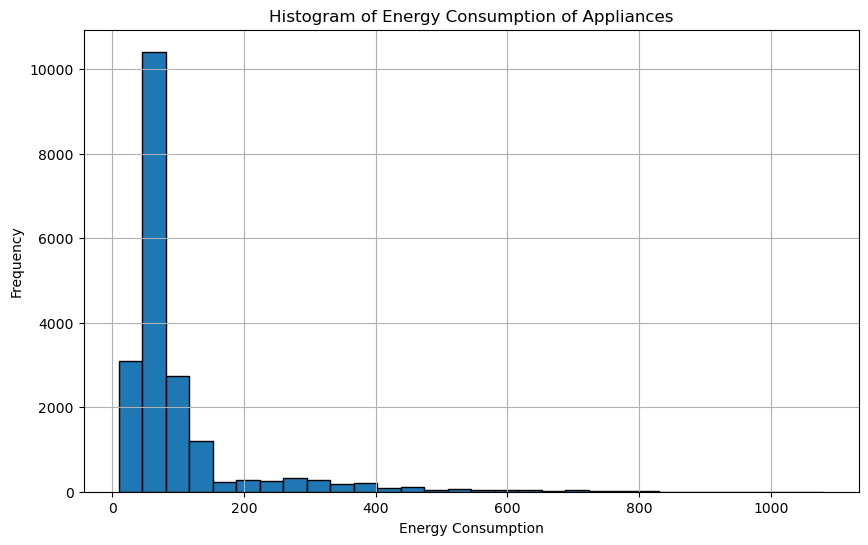

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data['Appliances'], bins=30, edgecolor='black')
plt.title('Histogram of Energy Consumption of Appliances')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Construct feature variable NSM (no. of seconds from midnight)

In [9]:
data['NSM'] = (data['date'] - data['date'].dt.normalize()).dt.total_seconds()

Plot energy consumption vs. NSM

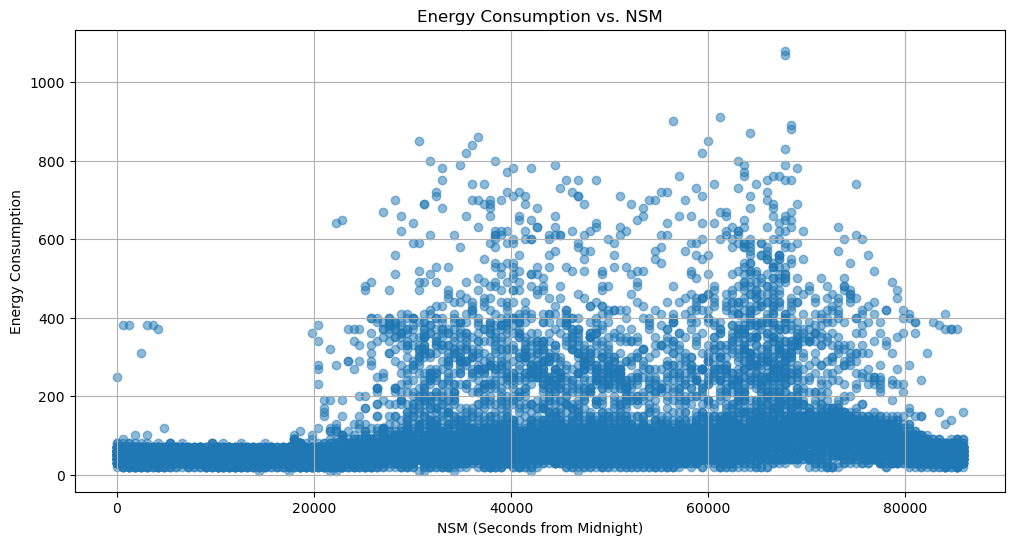

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(data['NSM'], data['Appliances'], alpha=0.5)
plt.title('Energy Consumption vs. NSM')
plt.xlabel('NSM (Seconds from Midnight)')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

Plot appliances energy consumption vs. Press mm Hg

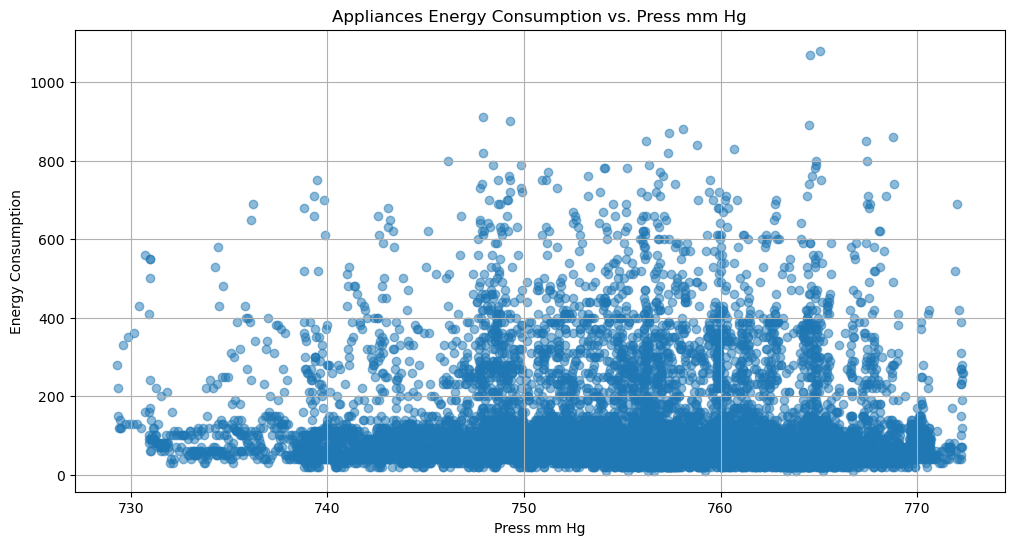

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Press_mm_hg'], data['Appliances'], alpha=0.5)
plt.title('Appliances Energy Consumption vs. Press mm Hg')
plt.xlabel('Press mm Hg')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

For NSM the zone from 0 to 20000 has a relatively Energy consumption compared to the zone from 20000 to 80000
For Press mm Hg the zone from 0 to 740 has a relatively Energy consumption compared to the zone from 740 to 770, also the zone from 750 to 760 seems to be the highest Energy consuption inspite the fact that there are two outliers in the zone 760 to 770